In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df=pd.read_csv(r'D:/Programming/Mini Project/Student_Depression/Dataset/Datasetprocessed_student_depression.csv')

In [3]:
df.head()

,gender,age,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,have_you_ever_had_suicidal_thoughts_,work/study_hours,financial_stress,family_history_of_mental_illness,depression
0,Male,33.0,5.0,8.97,2.0,1,2,1,3.0,1.0,0,1
1,Female,24.0,2.0,5.90,5.0,1,1,0,3.0,2.0,1,0
2,Male,31.0,3.0,7.03,5.0,0,2,0,9.0,1.0,1,0
3,Female,28.0,3.0,5.59,2.0,2,1,1,4.0,5.0,1,1
4,Female,25.0,4.0,8.13,3.0,1,1,1,1.0,1.0,0,0


In [4]:
list(df.columns)

['gender',
 'age',
 'academic_pressure',
 'cgpa',
 'study_satisfaction',
 'sleep_duration',
 'dietary_habits',
 'have_you_ever_had_suicidal_thoughts_',
 'work/study_hours',
 'financial_stress',
 'family_history_of_mental_illness',
 'depression']

In [5]:
df = df.drop("gender", axis=1)

In [6]:
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, drop_first=True)

In [7]:
if df['depression'].dtype == 'object':
    df['depression'] = df['depression'].map({'Yes': 1, 'No': 0})

In [8]:
X = df.drop('depression', axis=1)
y = df['depression']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "AdaBoost": AdaBoostClassifier()
}

In [12]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n🔹 {name}")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))


🔹 Logistic Regression
Accuracy: 0.856297093649085
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2310
           1       0.87      0.89      0.88      3264

    accuracy                           0.86      5574
   macro avg       0.85      0.85      0.85      5574
weighted avg       0.86      0.86      0.86      5574


🔹 K-Nearest Neighbors
Accuracy: 0.8293864370290636
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      2310
           1       0.84      0.87      0.86      3264

    accuracy                           0.83      5574
   macro avg       0.83      0.82      0.82      5574
weighted avg       0.83      0.83      0.83      5574


🔹 Support Vector Classifier
Accuracy: 0.8500179404377467
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      2310
           1       0.86      0.89      0.87      3264

    accuracy         

c:\Users\xxxni\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:32:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔹 XGBoost
Accuracy: 0.8410477215644062
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2310
           1       0.85      0.88      0.87      3264

    accuracy                           0.84      5574
   macro avg       0.84      0.83      0.84      5574
weighted avg       0.84      0.84      0.84      5574


🔹 AdaBoost
Accuracy: 0.852529601722282
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2310
           1       0.86      0.89      0.88      3264

    accuracy                           0.85      5574
   macro avg       0.85      0.84      0.85      5574
weighted avg       0.85      0.85      0.85      5574



In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

c:\Users\xxxni\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:33:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


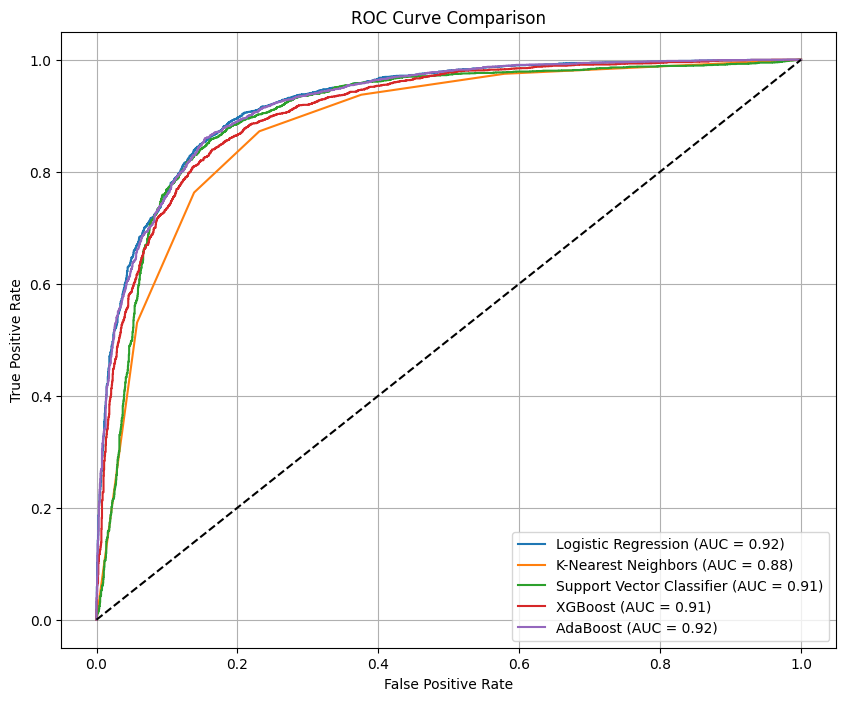

In [14]:
plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    auc_score = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

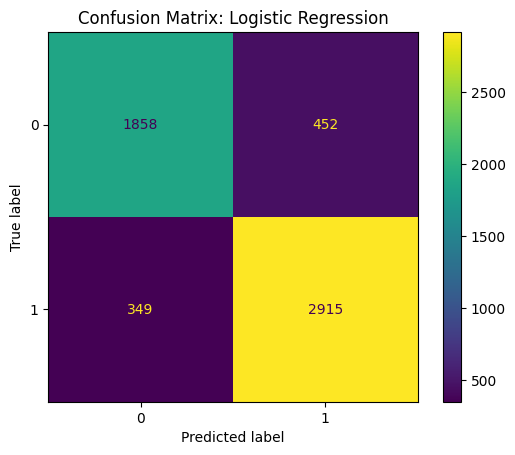

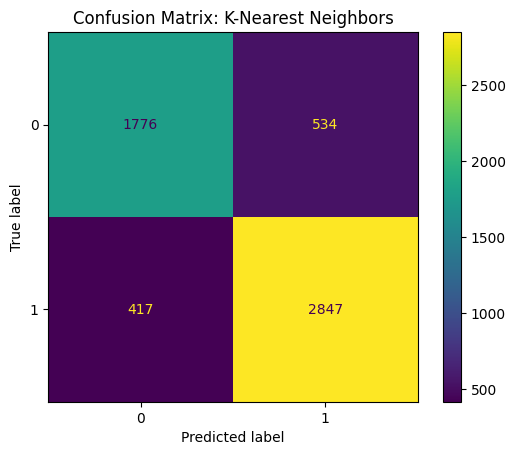

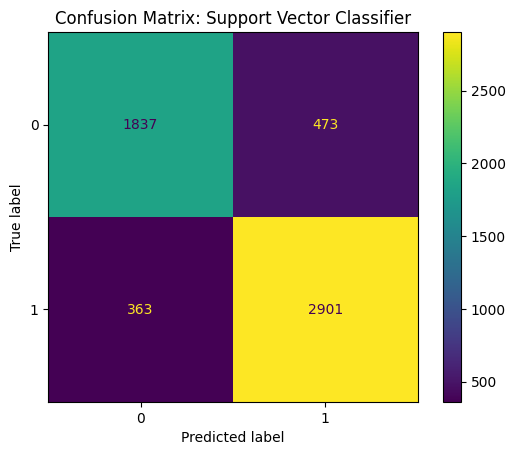

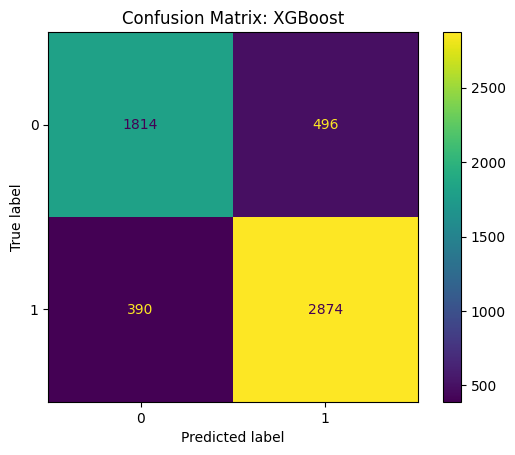

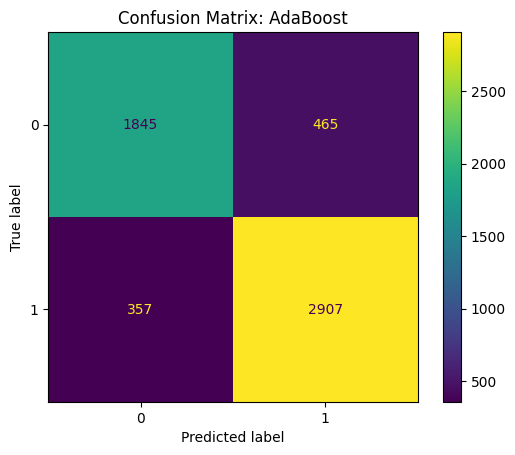

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

In [16]:
import joblib

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [21]:
# Save the model
joblib.dump(model, 'logistic_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [23]:
loaded_model = joblib.load('D:/Programming/Mini Project/Student_Depression/Jupyter/logistic_model.pkl')
loaded_scaler = joblib.load('D:/Programming/Mini Project/Student_Depression/Jupyter/scaler.pkl')


In [24]:
sample = X_test.iloc[0].values.reshape(1, -1)

In [25]:
sample_scaled = loaded_scaler.transform(sample)

c:\Users\xxxni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [26]:
# Predict
print(loaded_model.predict(sample_scaled))

[0]
